In [2]:
from infer import load_model
import torch
from math import sqrt, ceil
import numpy as np
from matplotlib import pyplot as plt
from metrics import compute_metrics
from tqdm import tqdm
from shared import (
    ACCURACY, PRECISION, RECALL, F1_SCORE, IOU,
    VALIDATION, TEST, TRAIN,
    DEVICE
)
from pathlib import Path
import pandas as pd
%load_ext autoreload
%autoreload 2
device = DEVICE
from evaluate import evaluate_model, evaluate_test_mode


In [11]:
exp=50
exp = 53
# exp = 1004 # Distilled version of 53
checkpoint = 'best_model'
# checkpoint = 'last_model'
model, dl_dict, model_config = load_model(exp, batch_size=16, model_name=checkpoint+".pt")

TOTAL ELEMENTS 7737
TOTAL ELEMENTS 1935
TOTAL ELEMENTS 2538


In [12]:
metrics_validation, detailed_metrics_validation = evaluate_model(model, dl_dict, phase=VALIDATION, detailed_metrics_flag=True)
metrics_train, detailed_metrics_train =evaluate_model(model, dl_dict, phase=TRAIN, detailed_metrics_flag=True)

100%|██████████| 121/121 [00:18<00:00,  6.54it/s]


Metrics on validation set
{'accuracy': 0.9747447371482849, 'precision': 0.7753747701644897, 'recall': 0.9004101157188416, 'dice': 0.7825585603713989, 'iou': 0.7083650231361389}


100%|██████████| 484/484 [01:22<00:00,  5.84it/s]

Metrics on train set
{'accuracy': 0.9785500764846802, 'precision': 0.8026665449142456, 'recall': 0.9166544675827026, 'dice': 0.8157516121864319, 'iou': 0.744350254535675}


In [13]:
def visualize_performance_per_well(df, chosen_metrics=[F1_SCORE, IOU], title='Metrics per Well'):
    # Group by 'well' and calculate mean
    grouped = df.groupby('well')[chosen_metrics].mean()

    # Plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Twin the axes for two different y-axis scales
    ax2 = ax1.twinx()
    axs = [ax1, ax2]
    colors = ['g', 'orange']

    # Plotting
    for idx, chosen_metric in enumerate(chosen_metrics):
        grouped[chosen_metric].plot(kind='bar', ax=axs[idx], color=colors[idx], position=idx, width=0.4, label=chosen_metric)
    # grouped[F1_SCORE].plot(kind='bar', ax=ax1, position=1, color='blue', width=0.4, label=F1_SCORE)
    # grouped[IOU].plot(kind='bar', ax=ax2, position=0, color='green', width=0.4, label=IOU)

    # Setting the axis labels
    ax1.set_xlabel('Well')
    for idx, chosen_metric in enumerate(chosen_metrics):
        axs[idx].set_ylabel(chosen_metric)
    # ax1.set_ylabel(F1_SCORE, color='blue')
    # ax2.set_ylabel(IOU, color='green')

    # Setting the tick label size
    # ax1.tick_params(axis='y', colors='blue')
    # ax2.tick_params(axis='y', colors='green')

    # Legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    for ax in axs:
        # ax.set_ylim(0., 1.)
        ax.set_ylim(0.4, 0.9)

    plt.grid()
    plt.title(title)
    plt.show()

def get_global_metrics_str(metrics_dict):
    global_metrics_str = ""
    for key, value in metrics_dict.items():
        global_metrics_str += f"{key}: {value:.1%} "
    return global_metrics_str


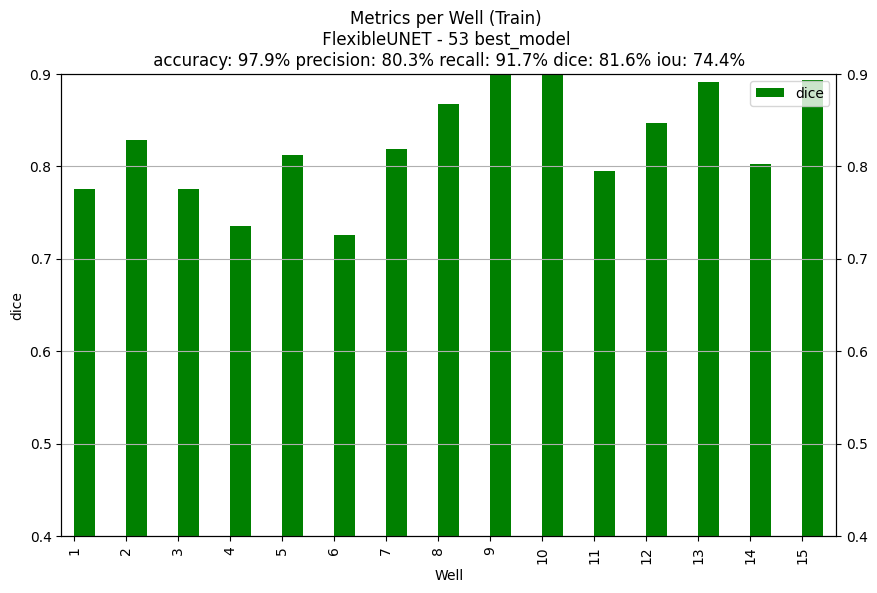

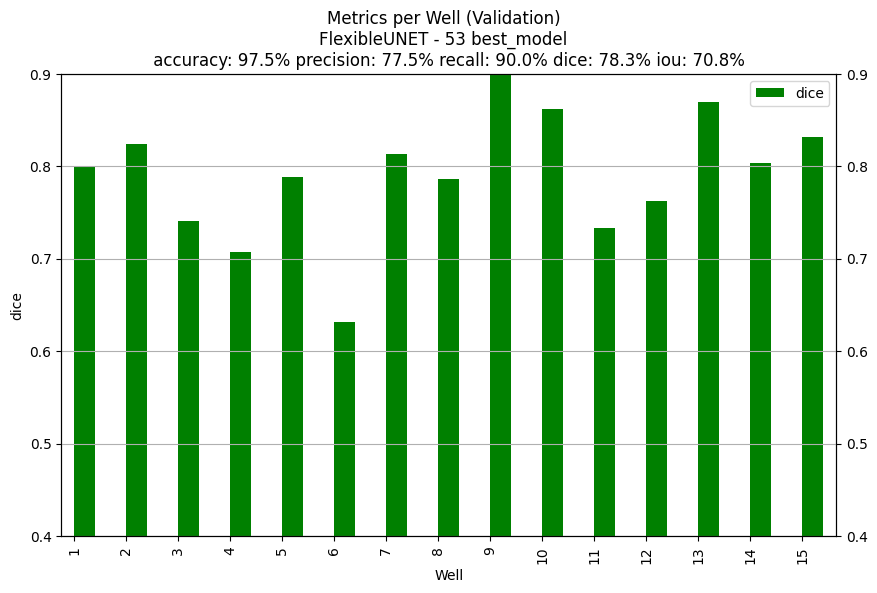

In [14]:
df_train = pd.DataFrame(detailed_metrics_train)
chosen_metrics=[F1_SCORE,]
# chosen_metrics = [PRECISION, RECALL]
model_name = model_config['model']['name'] + ' - ' + str(exp) + " " + checkpoint

visualize_performance_per_well(df_train, chosen_metrics=chosen_metrics, title=f'Metrics per Well (Train) \n {model_name}  \n {get_global_metrics_str(metrics_train)}')

df_validation = pd.DataFrame(detailed_metrics_validation)
visualize_performance_per_well(df_validation, chosen_metrics=chosen_metrics, title=f'Metrics per Well (Validation)  \n{model_name}  \n {get_global_metrics_str(metrics_validation)}')
### -> Test 1 3 4 5

In [4]:
labeled_dict = evaluate_test_mode(model, dl_dict, save_path=Path(f'__submission_{exp:04d}_dataset_update.csv'))

  0%|          | 0/159 [00:00<?, ?it/s]

100%|██████████| 159/159 [00:12<00:00, 13.09it/s]
